In [76]:
%matplotlib inline
import pandas as pd
import numpy as np
import os
import json
from PIL import Image
import matplotlib.pyplot as plt
import random

## Our images

Lets see what some of our coins look like.

In [77]:
# Load the json mapper
with open('cat_to_name.json', 'r') as f:
    cat_to_name = json.load(f)
    
user_dir = os.path.expanduser('~')
base_path = user_dir + "/Desktop/stuff/coin_cnn/data/train/"
data_directories = os.listdir(base_path) # All the directories.

In [78]:
images = []
# Iterate through every directory and gather some data.
for ii, data_dir in enumerate(data_directories):
    data_path = base_path + data_dir
    image_dir = os.listdir(data_path)
    
    # Iterate through every image in the directory.
    for ii, image in enumerate(image_dir):    
        image_path = data_path + '/' + image
        images.append(image_path)

        break # show only the first image per directory  

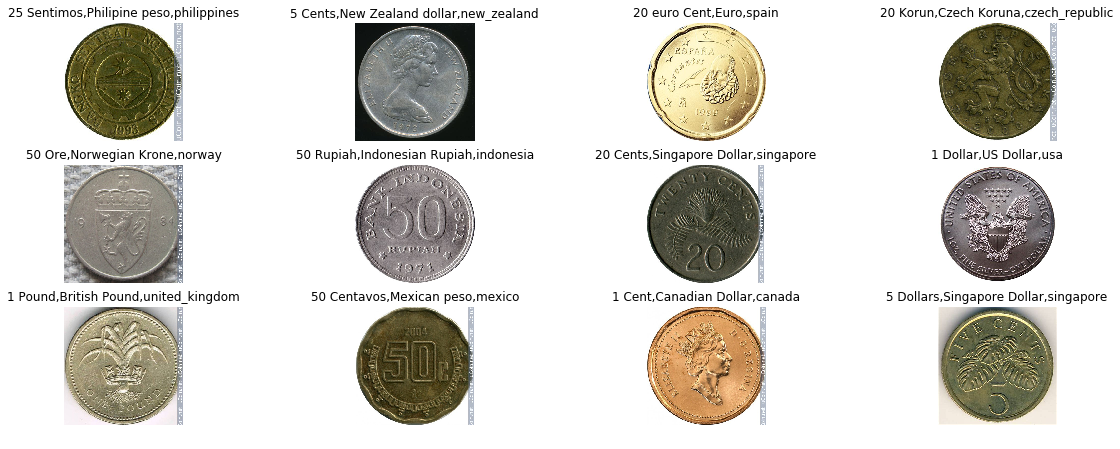

In [81]:
random_idx = [random.randint(1,len(cat_to_name)) for i in range(12)] # Get random indices
images_rand = [images[idx] for idx in random_idx] # Get the images from the random indices

# Show some of the images in our dataset.
plt.figure(figsize=(20,10))

columns = 4
for i, image in enumerate(images_rand):
    image_id = image.split("/")[-2]
    coin_data = cat_to_name[data_dir].split(",")
    coin_name, coin_currency, country = coin_data[0], coin_data[1], coin_data[2]
    
    plt.subplot(len(images_rand) / columns + 1, columns, i + 1)
    plt.axis('off') # Remove the axis
    pil_image = Image.open(image)
    plt.imshow(pil_image)
    plt.title(cat_to_name[str(image_id)])

## Create a table
I'll create a table that cointains information about the dataset:
* coin's image width
* coin's image height
* coin's name
* coin's currency 
* coin's country

I'll iterate through each directory to extract the information for each image and add it to a table.

In [82]:
coins_data = pd.DataFrame(columns=[
    'coin_name', 'currency', 'country', 'image_width','image_height', 'image_name'])

coins_data

,coin_name,currency,country,image_width,image_height,image_name


In [83]:
df_idx = 1 # Index where we'll append the next row

# Iterate through every image and gather some data.
for data_dir in data_directories:
    data_path = base_path + data_dir
    coin_data = cat_to_name[data_dir].split(",")
    coin_name, coin_currency, country = coin_data[0], coin_data[1], coin_data[2]
    
    image_dir = os.listdir(data_path)

    for ii, image in enumerate(image_dir):
        
        image_path = data_path + '/' + image
        pil_image = Image.open(image_path)
        image_width, image_height = pil_image.size
        
        image_info = [coin_name, coin_currency, country, image_width, image_height, image]
        coins_data.loc[df_idx] = image_info
        
        df_idx = df_idx +1 # Change the index for the next iteration
        
print("total number of images = ", len(coins_data))

total number of images =  6413


In [87]:
coins_data[:10]

,coin_name,currency,country,image_width,image_height,image_name
1,500 Pesos,Chilean Peso,chile,474,472,039__500 Pesos_chile.jpg
2,500 Pesos,Chilean Peso,chile,497,500,059__500 Pesos_chile.jpg
3,500 Pesos,Chilean Peso,chile,500,495,032__500 Pesos_chile.jpg
4,500 Pesos,Chilean Peso,chile,500,500,030__500 Pesos_chile.jpg
5,500 Pesos,Chilean Peso,chile,312,316,029__500 Pesos_chile.jpg
6,500 Pesos,Chilean Peso,chile,499,500,018__500 Pesos_chile.jpg
7,500 Pesos,Chilean Peso,chile,500,500,019__500 Pesos_chile.jpg
8,500 Pesos,Chilean Peso,chile,312,320,046__500 Pesos_chile.jpg
9,500 Pesos,Chilean Peso,chile,474,468,033__500 Pesos_chile.jpg
10,500 Pesos,Chilean Peso,chile,412,412,049__500 Pesos_chile.jpg


## Visualizing our data

### Average image heights and widths

Text(0.8,0.65,'max = 953px')

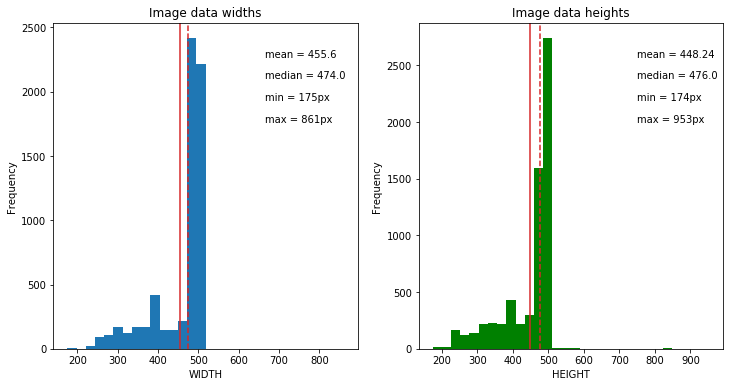

In [74]:

plt.subplot(1, 2, 1)
coins_data.image_width.plot(kind="hist", bins=30)
plt.axvline(coins_data.image_width.mean(), c="C3")
plt.axvline(coins_data.image_width.median(), c="C3", linestyle="--")
plt.xlabel("WIDTH")
plt.title("Image data widths")
plt.figtext(.37, .8, "mean = {}".format(round(coins_data.image_width.mean(), 2)))
plt.figtext(.37, .75, "median = {}".format(round(coins_data.image_width.median(),2)))
plt.figtext(.37, .7, "min = {}px".format(coins_data.image_width.min()))
plt.figtext(.37, .65, "max = {}px".format(coins_data.image_width.max()))



plt.subplot(1, 2, 2)
coins_data.image_height.plot(kind="hist", bins=30, color='green')
plt.axvline(coins_data.image_height.mean(), c="C3")
plt.axvline(coins_data.image_height.median(), c="C3", linestyle="--")
plt.title("Image data heights")
plt.xlabel("HEIGHT")
plt.figtext(.8, .8, "mean = {}".format(round(coins_data.image_height.mean(), 2)))
plt.figtext(.8, .75, "median = {}".format(round(coins_data.image_height.median(),2)))
plt.figtext(.8, .7, "min = {}px".format(coins_data.image_height.min()))
plt.figtext(.8, .65, "max = {}px".format(coins_data.image_height.max()))

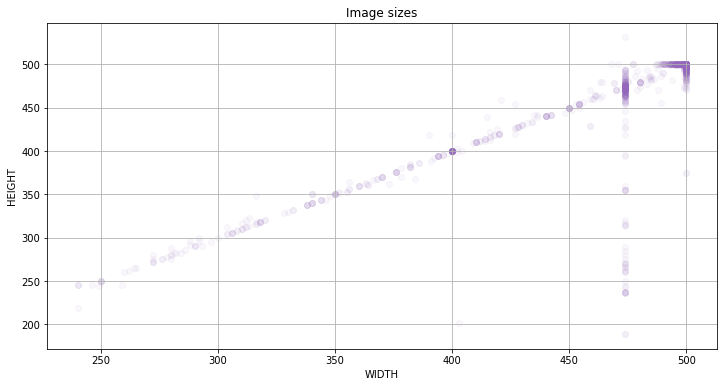

In [152]:
size_sample = coins_data.sample(1000) # Get a sample of the data

plt.scatter(size_sample.image_width, size_sample.image_height, alpha=0.05, c='C4')
plt.rcParams["figure.figsize"] = [12, 6]
plt.title("Image sizes")
plt.xlabel("WIDTH")
plt.ylabel("HEIGHT")
plt.grid()

From the charts above we can observe that most images fall in between a width and height in between 200px to 500px. The most common sizes are 475x475px and 500x500px. We can also see that most of the images are square shaped, as we can see from the 45º line formed by the plots.

### Coins by currency

For fun lets check how many coins there are per currency

In [25]:
coins_data_simplified = pd.DataFrame(columns=['coin_name', 'currency', 'country'])

for ii in range(len(cat_to_name)):
    idx = str(ii+1)
    coin_data = cat_to_name[idx].split(",")
    coin_name, coin_currency, country = coin_data[0], coin_data[1], coin_data[2]
    
    coin_info = [coin_name, coin_currency, country]
    coins_data_simplified.loc[idx] = coin_info




Text(0,-5,'n_coins mean = 6.59375,  n_coins mode = 6')

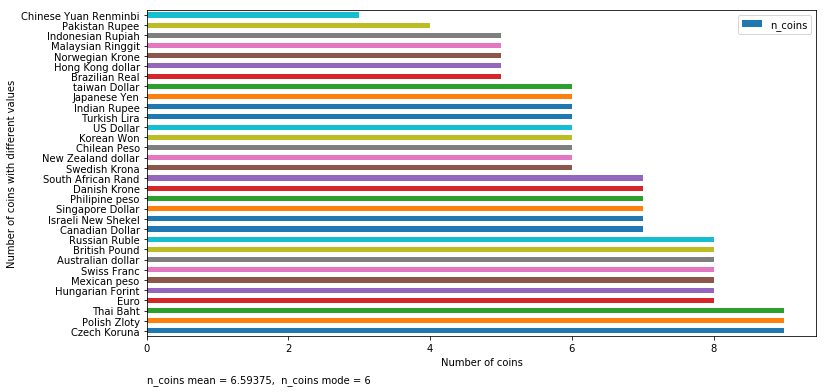

In [146]:

coins_per_country = pd.DataFrame(coins_data_simplified.currency.value_counts())
coins_per_country=coins_per_country.rename(columns = {'currency':'n_coins'})

coins_per_country.plot.barh(y="n_coins")
plt.xlabel("Number of coins")
plt.ylabel("Number of coins with different values")
plt.text(0,-5,"n_coins mean = {},  n_coins mode = {}".
         format(
             coins_per_country.n_coins.mean(),
             coins_per_country.n_coins.mode().loc[0]))


All currencies have between 3 and 9 coins. 